In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import reverse_geocode as rg

In [5]:
import json

In [6]:
csv_path='D:/Learning/DataScience/PlusCourses/DataVisualization/Meteorite2.0/Meteorite_Landings.csv'

In [7]:
df=pd.read_csv(csv_path)

In [8]:
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,01/01/1919 12:00:00 AM,32.10000,71.80000,"(32.100000, 71.800000)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,01/01/1949 12:00:00 AM,44.83333,95.16667,"(44.833330, 95.166670)"
7,Agen,392,Valid,H5,30000.0,Fell,01/01/1814 12:00:00 AM,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,01/01/1930 12:00:00 AM,-31.60000,-65.23333,"(-31.600000, -65.233330)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,01/01/1920 12:00:00 AM,-30.86667,-64.55000,"(-30.866670, -64.550000)"


In [11]:
# Hibas adatok kiszurese: Neha ures dataframe-t terit vissza ?!
df = df[(df[u'reclat'] != 0.0) & (df[u'reclong'] != 0.0) & (df[u'reclong'] >= -180) & (df[u'reclong'] <= 180) & (df[u'year'] >= 860) & (df[u'year'] <= 2016)]

In [13]:
df=df.drop(u'id', axis=1)

In [14]:
df.dropna(inplace=True)

In [16]:
valid=df

In [12]:
valid.index=[i for i in range(len(valid.index))]

In [13]:
valid.rename(columns={'mass (g)': 'mass'}, inplace = True)

In [23]:
tipus=[i for i in range(len(valid.index))]
orszag=[i for i in range(len(valid.index))]
for i in range(len(valid.index)):
    recclass=valid.loc[i]['recclass']
    if 'Iron' in recclass:
        tipus[i]='Iron'
    elif 'Mesosiderite' in recclass or 'Pallasite' in recclass:
        tipus[i]='Stony-Iron'
    else:
        tipus[i]='Stony'
    
    # Antarktisszal problema!!
    if valid.loc[i]['reclat'] <= -60:
        orszag[i]='Antarctica'
    else:
        coordinate=valid.loc[i]['reclat'], valid.loc[i]['reclong']
        orszag[i]=rg.get(coordinate)['country']
        
valid['type']=tipus
valid['country']=orszag
    

In [24]:
gf=[]
for i in range(len(valid.index)):
    seged={}
    for j in range(len(valid.loc[i])):
        seged[valid.columns[j]]=str(valid.loc[i][j])
    gf.append(seged)

In [25]:
gf

[{'GeoLocation': '(50.775000, 6.083330)',
  'country': 'Germany',
  'fall': 'Fell',
  'mass': '21.0',
  'name': 'Aachen',
  'nametype': 'Valid',
  'recclass': 'L5',
  'reclat': '50.775',
  'reclong': '6.08333',
  'type': 'Stony',
  'year': '01/01/1880 12:00:00 AM'},
 {'GeoLocation': '(56.183330, 10.233330)',
  'country': 'Denmark',
  'fall': 'Fell',
  'mass': '720.0',
  'name': 'Aarhus',
  'nametype': 'Valid',
  'recclass': 'H6',
  'reclat': '56.18333',
  'reclong': '10.23333',
  'type': 'Stony',
  'year': '01/01/1951 12:00:00 AM'},
 {'GeoLocation': '(54.216670, -113.000000)',
  'country': 'Canada',
  'fall': 'Fell',
  'mass': '107000.0',
  'name': 'Abee',
  'nametype': 'Valid',
  'recclass': 'EH4',
  'reclat': '54.21667',
  'reclong': '-113.0',
  'type': 'Stony',
  'year': '01/01/1952 12:00:00 AM'},
 {'GeoLocation': '(16.883330, -99.900000)',
  'country': 'Mexico',
  'fall': 'Fell',
  'mass': '1914.0',
  'name': 'Acapulco',
  'nametype': 'Valid',
  'recclass': 'Acapulcoite',
  'reclat

In [29]:
json_path='D:/Learning/DataScience/PlusCourses/DataVisualization/Meteorite2.0/Meteorite_Landings2.json'

In [30]:
file(json_path,'w').write(json.dumps(gf))

In [32]:
#Orszag szerinti eloszlas
#plt.rcParams['font.size'] = 20
#valid_cgroup=valid.groupby('country')
#valid_sum=valid_cgroup.size()
#valid_sum.sort_values(ascending=True, inplace=True)

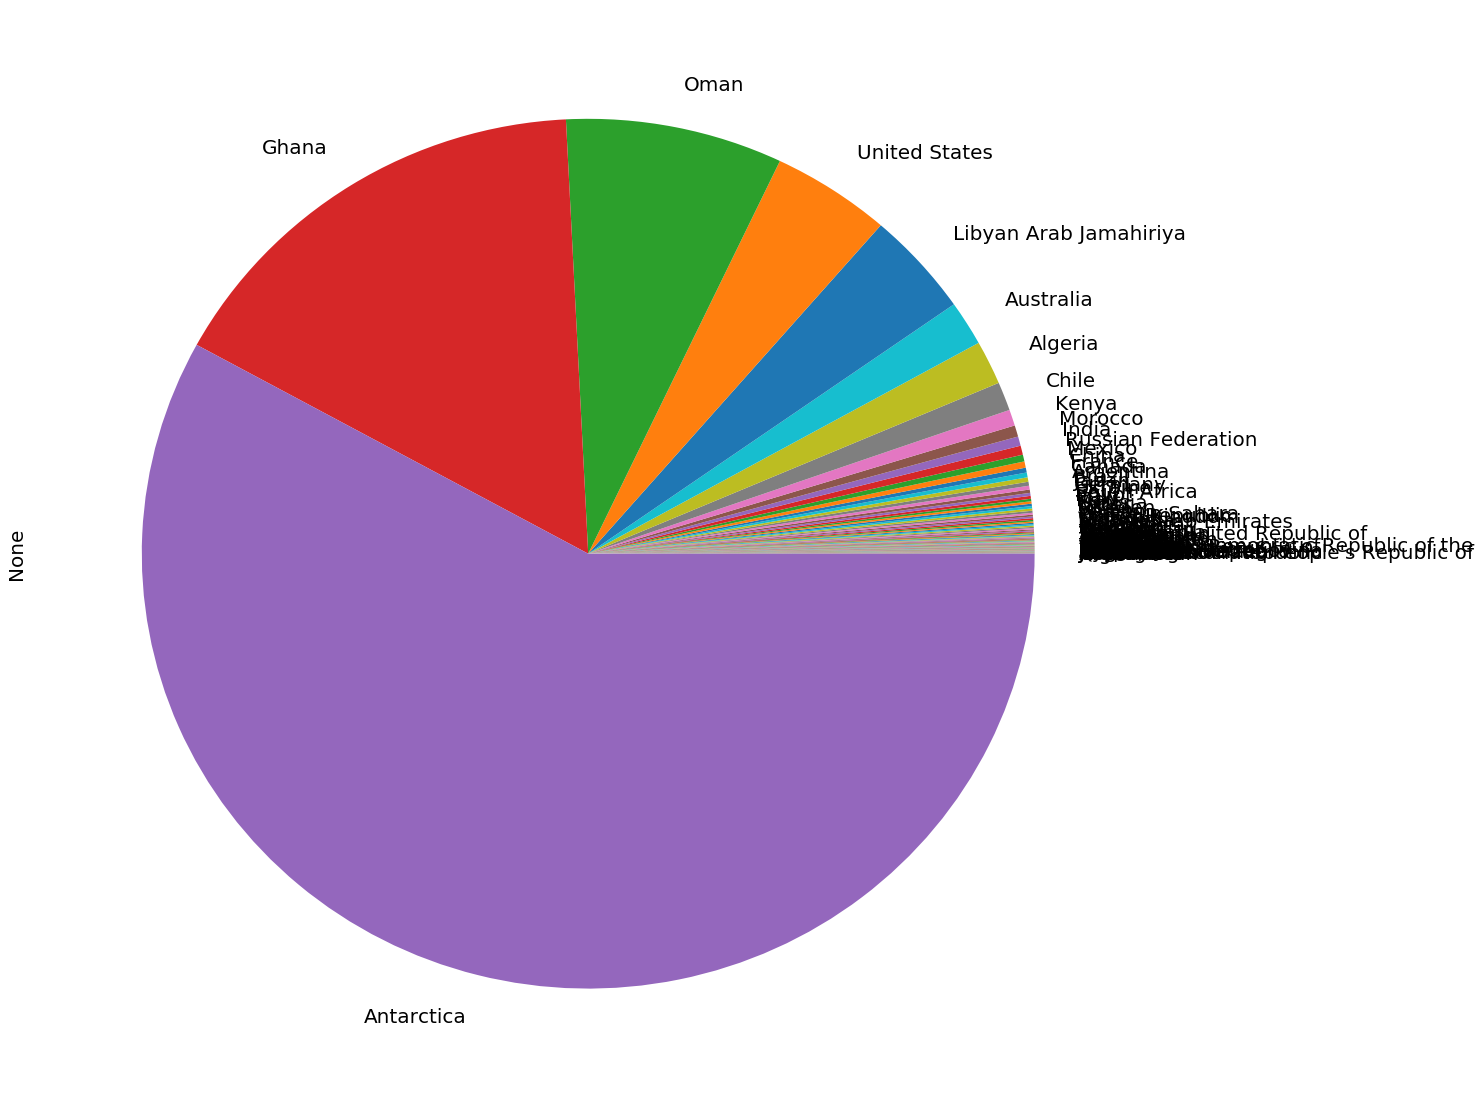

In [35]:
#valid_sum.plot.pie(figsize=(20, 20))

In [ ]:
# Latott es megtalalt szetvalasztasa
#fell=valid[valid['fall']=="Fell"].copy()
#found=valid[valid['fall']=="Found"].copy()
#found.index=[i for i in range(len(found.index))]
#fell.index=[i for i in range(len(fell.index))]